# Table of Contents
01. Importing libraries
02. Importing data
03. Data cleaning
<br>I. Missing values
<br>II. Duplicate values
<br>III. Mixed-type data
<br>IV. Extreme values checks
04. Explore data visually
05. Hypothesis
06. Data prep for regression analysis
07. Split the data into a training set and a test set
08. Linear regression
09. Create a plot for the regression line on the test set
10. Model performance statistics
11. Compare the predicted y values with the actual y values
12. Final thoughts
13. Additional: multiple regression model
<br>I. Consider the top 5 features with the largest impact on the 'price' variable
<br>II. Consider all the features

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Importing data

In [2]:
# Define csv path
path = r'C:\Users\lucav\Desktop\CareerFoundry\Projects\Project 5 - House Sales in King County, USA'

In [3]:
# Import data from 'kc_house_data.csv'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_final.csv'), index_col = 0)

In [4]:
# Check the number of rows and columns
df.shape

(21613, 21)

In [5]:
# Display the top 5 rows
pd.set_option('display.max_columns', None)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Size category
0,2014-10,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Medium
1,2014-12,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Large
2,2015-02,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Small
3,2014-12,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Medium
4,2015-02,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Medium


In [6]:
# Display columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Size category'],
      dtype='object')

# 03. Data cleaning

## I. Missing values

In [7]:
# Find missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Size category    0
dtype: int64

No missing values found.

## II. Duplicate values

In [8]:
# Find duplicate values
df_dups = df[df.duplicated()]

# Return df_dups
df_dups

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Size category
4352,2015-03,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928,Medium
20524,2015-03,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352,Medium


Although the check for duplicate values returns two records, these are not duplicates. Hence, no action is required.

## III. Mixed-type data

In [9]:
# Check for mixed-type data
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

No mixed-type data found.

## IV. Extreme values checks

In [10]:
# Check the mean, median and max of the 'price' column
print('The mean of "price" is:' , df['price'].mean())
print('The median of "price" is:' , df['price'].median())
print('The max of "price" is:' , df['price'].max())

The mean of "price" is: 540088.1417665294
The median of "price" is: 450000.0
The max of "price" is: 7700000.0


In [11]:
# Check the mean, median and max of the 'sqft_living' column
print('The mean of "sqft_living" is:' , df['sqft_living'].mean())
print('The median of "sqft_living" is:' , df['sqft_living'].median())
print('The max of "sqft_living" is:' , df['sqft_living'].max())

The mean of "sqft_living" is: 2079.8997362698374
The median of "sqft_living" is: 1910.0
The max of "sqft_living" is: 13540


# 04. Explore data visually

In [12]:
# Display the correlation between each feature and the 'price' variable
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

The list above shows that a strong positive relationship exists between the 'price' and 'sqft_living' variables.

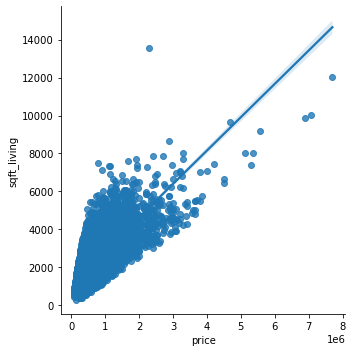

In [13]:
# Create a scatterplot for the 'price' and 'sqft_living' columns in seaborn
scatter1 = sns.lmplot(x = 'price', y = 'sqft_living', data = df)

# 05. Hypothesis

If a house has a larger living area, then its sales price will be higher.

# 06. Data prep for regression analysis

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

# 07. Split the data into a training set and a test set

In [15]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 08. Linear regression

In [16]:
# Create a regression object
regression = LinearRegression()

In [17]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

# 09. Create a plot for the regression line on the test set

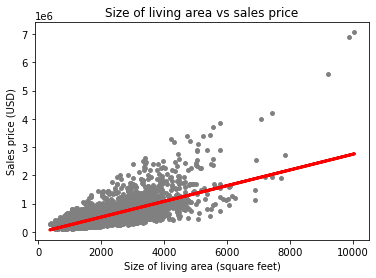

In [19]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Size of living area vs sales price')
plot_test.xlabel('Size of living area (square feet)')
plot_test.ylabel('Sales price (USD)')
plot_test.show()

The regression line appears to fit data points at low prices better than at high prices. In fact, it can be observed that more data points cluster around the regression line at lower prices, while there is a greater degree of variability at higher prices where the data points are scattered more widely.

# 10. Model performance statistics

In [20]:
# Print the model summary statistics
print('Mean squared error: ', mean_squared_error(y_test, y_predicted))
print('R2 score: ', r2_score(y_test, y_predicted))

Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


# 11. Compare the predicted y values with the actual y values

In [21]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,297000.0,3.601163e+05
1,1578000.0,1.261901e+06
2,562100.0,3.628996e+05
3,631500.0,2.766177e+05
4,780000.0,8.471914e+05
5,485000.0,4.213486e+05
6,340000.0,4.408316e+05
7,335606.0,6.685044e+05
8,425000.0,6.467948e+05
9,490000.0,1.203452e+06


# 12. Final thoughts

Even though the correlation analysis showed a strong positive relationship between the 'price' and 'sqft_living' variables, the regression model turned out to be a poor fit. 
<br>In fact, looking at the model performance statistics, the R2 score indicates that the model only explains 49% of the variance in the data; thus, the model isn't performing well.
<br> In conclusion, **the size of the living area is not enough to predict sales price**.

# 13. Additional: multiple regression model

## I. Consider the top 5 features with the largest impact on the 'price' variable

A multiple regression model will be now built to predict the 'price' variable using the 5 features more strongly correlated to that:
- **sqft_living**: size of living area (square feet)
- **grade**: classification by construction quality (higher grade indicates better quality)
- **sqft_above**: square feet above ground
- **sqft_living15**: average size of interior housing living space for the closest 15 houses (square feet)
- **bathrooms**: number of bathrooms

In [22]:
# Split data into independent variables ('X1') and dependent variables ('y1')
X1 = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']].values
y1 = df['price'].values

In [23]:
# Split data into a training set and a test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [24]:
# Create a regression object
regression1 = LinearRegression()

In [25]:
# Fit the regression object onto the training set
regression1.fit(X1_train, y1_train)

LinearRegression()

In [26]:
# Predict the values of y1 using X1
y1_predicted = regression1.predict(X1_test)

In [27]:
# Print the model summary statistics
print('Mean squared error: ', mean_squared_error(y1_test, y1_predicted))
print('R2 score: ', r2_score(y1_test, y1_predicted))

Mean squared error:  63250352615.54879
R2 score:  0.5393003605710067


The R2 score has now increased from 49% to 54%, indicating that the accuracy of the model has slightly improved.

## II. Consider all the features

In order to improve the accuracy of the model, all the other features will now be included in the multiple regression model.
<br> The only variable that will be removed is 'Size category' because it's a string, so it can't be fed into the regression model.

In [28]:
# Convert the 'date' variable from object to number
df["date"] = pd.to_datetime(df["date"])

# Create the 'year' and 'month' columns to store the new numeric variables
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date. month)

# Drop the 'date' column
df.drop("date", axis=1, inplace=True)

In [29]:
# Display columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Size category', 'year', 'month'],
      dtype='object')

In [30]:
# Split data into independent variables ('X2') and dependent variables ('y2')
X2 = df.drop(["price", "Size category"], axis=1).values
y2 = df['price'].values

In [31]:
# Split data into a training set and a test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [32]:
# Create a regression object
regression2 = LinearRegression()

In [33]:
# Fit the regression object onto the training set
regression2.fit(X2_train, y2_train)

LinearRegression()

In [34]:
# Predict the values of y2 using X2
y2_predicted = regression2.predict(X2_test)

In [35]:
# Print the model summary statistics
print('Mean squared error: ', mean_squared_error(y2_test, y2_predicted))
print('R2 score: ', r2_score(y2_test, y2_predicted))

Mean squared error:  42669810584.96729
R2 score:  0.6892038457005318


The R2 score has now increased to 69%, indicating that the accuracy of the model improves as more features are taken into account.